In [1]:
import pandas as pd
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import math

In [2]:
# Dataset organized by thread IDs here
data = pd.read_excel("Ummah_20k_ThrdID.xlsx", index_col=None, header=None)


In [3]:
print(data)

              0         1                                                  2   \
0      MessageID  ThreadID                                         ThreadName   
1            105        19                                         Ridiculous   
2            101        26  I know peace, beautiful peace and we made it h...   
3            103        26  I know peace, beautiful peace and we made it h...   
4            107        26  I know peace, beautiful peace and we made it h...   
...          ...       ...                                                ...   
19996    1051210    132752                                        Joke thread   
19997    1051275    132752                                        Joke thread   
19998    1057566    132752                                        Joke thread   
19999    1069718    132752                                        Joke thread   
20000    1069876    132752                                        Joke thread   

             3             

# 1: Statistics: Response time



In [4]:
date_string = "2002-04-02 01:42:00.000"
date2 = "2002-04-02 01:33:00.000"
print(datetime.fromisoformat(date_string) - datetime.fromisoformat(date2))

0:09:00


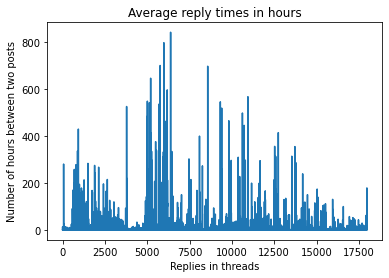

Average time between two posts:  5:00:55.418522


In [5]:
count = -1
totalTime = datetime.fromisoformat("2002-04-02 01:42:00.000") - datetime.fromisoformat("2002-04-02 01:42:00.000")
divider = 0
differences = []
x_axis = []
for i in data[1]:
    count += 1
    if (count < 20000 and data[1][count] == data[1][count+1]):
        try:
            difference = abs(datetime.fromisoformat(data[9][count]) - datetime.fromisoformat(data[9][count+1]))
        except (TypeError, ValueError):
            # Invalid row
            continue
        else:
            divider += 1
            totalTime += difference
            differences.append(difference.total_seconds() / 3600) # seconds to hours
            x_axis.append(divider)  


# x axis values 
x = x_axis
# corresponding y axis values 
y = differences 
    
# plotting the points  
plt.plot(x, y) 
    
# naming the x axis 
plt.xlabel('Replies in threads') 
# naming the y axis 
plt.ylabel('Number of hours between two posts') 
    
# giving a title to my graph 
plt.title('Average reply times in hours') 
    
# function to show the plot 
plt.show() 

print("Average time between two posts: ", totalTime/divider)

# 2: Script to calculate number of users at state Susceptible, Infectious and Recovered


In [6]:
#Organize file according to messageID
file_mes = pd.read_excel('Ummah_20k_MsgID.xlsx', index_col=None, header=None, engine="openpyxl")
msg = 0
count = -1
resTime = datetime.fromisoformat("2002-04-02 01:42:00.000") - datetime.fromisoformat("2002-04-02 01:42:00.000")
sus = []
inf = []
res = []
#Loop message times
for i in file_mes[9]:
    count += 1
    msg = count + 1
    if msg > 20000:
        break
    try:
        #calculate time difference
        diff = abs(datetime.fromisoformat(file_mes[9][count]) - datetime.fromisoformat(file_mes[9][msg]))
        diff = diff.total_seconds() / 3600 #seconds to hours
        if (file_mes[1][count] == file_mes[1][msg] and diff <= 5):
            #check if response (=another message in the same thread) happened before 5 hours
            if file_mes[3][count] in inf:
                #dont add user if already added
                pass
            else:
                #add userID to infectious
                inf.append(file_mes[3][count])
            count += 1
            msg += 1
            #set response time to 0 (new user)
            resTime = 0
        else: 
            msg += 1
            resTime += diff #response time increases
            if resTime > 5:
                #if response time over 5 hours, check if user is in inf list
                if file_mes[3][count] in inf:
                    inf.remove(file_mes[3][count]) #remove if found
                #User is Recovered
                res.append(file_mes[3][count])
                resTime = 0
    except (TypeError, ValueError):
            print("Invalid row")
                
print("Infective userIDs")
print(inf)
print("Recovered userIDs")
print(res)

Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Invalid row
Infective userIDs
[96, 17, 30, 32, 72, 89, 40, 22, 206, 221, 77, 154, 223, 84, 140, 226, 146, 45, 100, 165, 29, 225, 19, 532, 68, 79, 1350, 1393, 192, 1325, 337, 1439, 'searcher', 1247, 1528, 449, 324, 908, 510, 1513, 182, 1417, 591, 1545, 1046, 555, 762, 1560, 21, 1097, 898, 983, 1524, 48, 467, 554, 1599, 1282, 504, 1178, 1601, 1605, 1463, 1166, 929, 1536, 1628, 563, 8, 28, 1589, 155,

# 3: Plot the variation of number of Susceptible, Infectious and Recovered individuals using SIR diffusion mode in NDlib library

In [7]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

suicidebomb_threads = []
antiamerica_threads = []
georgebush_threads = []
wearhijab_threads = []
honorkilling_threads = []
binladen_threads = []
nuclearweapon_threads = []

# Defining threads from the database
count = 0
for i in data[5]:
    if count >= 20000:
        break        
    count += 1
    
    if("suicide bomb" in str(data[5][count]) and data[1][count] not in suicidebomb_threads):
        suicidebomb_threads.append(data[1][count])
        
    if("anti-America" in str(data[5][count]) and data[1][count] not in antiamerica_threads):
        antiamerica_threads.append(data[1][count])
       
    if("George Bush" in str(data[5][count]) and data[1][count] not in georgebush_threads):
        georgebush_threads.append(data[1][count])
        
    if("wear hijab" in str(data[5][count]) and data[1][count] not in wearhijab_threads):
        wearhijab_threads.append(data[1][count])
    
    if("honor killing" in str(data[5][count]) and data[1][count] not in honorkilling_threads):
        honorkilling_threads.append(data[1][count])
    
    if("Bin Laden" in str(data[5][count]) and data[1][count] not in binladen_threads):
        binladen_threads.append(data[1][count])  
        
    if("nuclear weapon" in str(data[5][count]) and data[1][count] not in nuclearweapon_threads):
        nuclearweapon_threads.append(data[1][count])      



# Network topology
G = nx.Graph()
suicidebomb_G = nx.Graph()
antiamerica_G = nx.Graph()
georgebush_G = nx.Graph()
wearhijab_G = nx.Graph()
honorkilling_G = nx.Graph()
binladen_G = nx.Graph()
nuclearweapon_G = nx.Graph()

count = 0

# Adding nodes to graphs
for i in data[0]:
    if count >= 20000:
        break        
    count += 1
    
    if (data[1][count] in suicidebomb_threads):
        suicidebomb_G.add_node(data[0][count])
    elif (data[1][count] in antiamerica_threads):
        antiamerica_G.add_node(data[0][count])    
    elif (data[1][count] in georgebush_threads):
        georgebush_G.add_node(data[0][count])    
    elif (data[1][count] in wearhijab_threads):
        wearhijab_G.add_node(data[0][count])    
    elif (data[1][count] in honorkilling_threads):
        honorkilling_G.add_node(data[0][count])    
    elif (data[1][count] in binladen_threads):
        binladen_G.add_node(data[0][count])    
    elif (data[1][count] in nuclearweapon_threads):
        nuclearweapon_G.add_node(data[0][count])       


# Adding edges to graph
count = 0
for i in data[0]:
    if count >= 19999:
        break
    count += 1
    if (data[1][count] == data[1][count+1]):
        
        if data[1][count] in suicidebomb_threads:
            suicidebomb_G.add_edge(data[0][count], data[0][count+1])
        elif data[1][count] in antiamerica_threads:
            antiamerica_G.add_edge(data[0][count], data[0][count+1])
        elif data[1][count] in georgebush_threads:
            georgebush_G.add_edge(data[0][count], data[0][count+1])
        elif data[1][count] in wearhijab_threads:
            wearhijab_G.add_edge(data[0][count], data[0][count+1]) 
        elif data[1][count] in honorkilling_threads:
            honorkilling_G.add_edge(data[0][count], data[0][count+1])
        elif data[1][count] in binladen_threads:
            binladen_G.add_edge(data[0][count], data[0][count+1]) 
        elif data[1][count] in nuclearweapon_threads:
            nuclearweapon_G.add_edge(data[0][count], data[0][count+1])
                                     
# Model selection
suicidebomb_model = ep.SIRModel(suicidebomb_G)
antiamerica_model = ep.SIRModel(antiamerica_G)
georgebush_model = ep.SIRModel(georgebush_G)                                     
wearhijab_model = ep.SIRModel(wearhijab_G)
honorkilling_model = ep.SIRModel(honorkilling_G)
binladen_model = ep.SIRModel(binladen_G)
nuclearweapon_model = ep.SIRModel(nuclearweapon_G)

# Defining beta & gamma based on probability of infective or recovery ids
beta = len(inf) / 20000
gamma = len(res) / 20000

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', beta)
cfg.add_model_parameter('gamma', gamma)
cfg.add_model_parameter("fraction_infected", 0.5)
suicidebomb_model.set_initial_status(cfg)
antiamerica_model.set_initial_status(cfg)
georgebush_model.set_initial_status(cfg)
wearhijab_model.set_initial_status(cfg)                                     
honorkilling_model.set_initial_status(cfg)                                     
binladen_model.set_initial_status(cfg)                                     
nuclearweapon_model.set_initial_status(cfg)                                     
                                                                       
# Simulation execution
suicidebomb_iterations = suicidebomb_model.iteration_bunch(200)
suicidebomb_trends = suicidebomb_model.build_trends(suicidebomb_iterations)

antiamerica_iterations = antiamerica_model.iteration_bunch(200)
antiamerica_trends = antiamerica_model.build_trends(antiamerica_iterations)

georgebush_iterations = georgebush_model.iteration_bunch(200)
georgebush_trends = georgebush_model.build_trends(georgebush_iterations)

wearhijab_iterations = wearhijab_model.iteration_bunch(200)
wearhijab_trends = wearhijab_model.build_trends(wearhijab_iterations)

honorkilling_iterations = honorkilling_model.iteration_bunch(200)
honorkilling_trends = honorkilling_model.build_trends(honorkilling_iterations)

binladen_iterations = binladen_model.iteration_bunch(200)
binladen_trends = binladen_model.build_trends(binladen_iterations)

nuclearweapon_iterations = nuclearweapon_model.iteration_bunch(200)
nuclearweapon_trends = nuclearweapon_model.build_trends(nuclearweapon_iterations)

from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

suicidebomb_viz = DiffusionTrend(suicidebomb_model, suicidebomb_trends)
suicidebomb_p = suicidebomb_viz.plot(width=400, height=400)
show(suicidebomb_p)

antiamerica_viz = DiffusionTrend(antiamerica_model, antiamerica_trends)
antiamerica_p = antiamerica_viz.plot(width=400, height=400)
show(antiamerica_p)

georgebush_viz = DiffusionTrend(georgebush_model, georgebush_trends)
georgebush_p = georgebush_viz.plot(width=400, height=400)
show(georgebush_p)

wearhijab_viz = DiffusionTrend(wearhijab_model, wearhijab_trends)
wearhijab_p = wearhijab_viz.plot(width=400, height=400)
show(wearhijab_p)

honorkilling_viz = DiffusionTrend(honorkilling_model, honorkilling_trends)
honorkilling_p = honorkilling_viz.plot(width=400, height=400)
show(honorkilling_p)

binladen_viz = DiffusionTrend(binladen_model, binladen_trends)
binladen_p = binladen_viz.plot(width=400, height=400)
show(binladen_p)

nuclearweapon_viz = DiffusionTrend(nuclearweapon_model, nuclearweapon_trends)
nuclearweapon_p = nuclearweapon_viz.plot(width=400, height=400)
show(nuclearweapon_p)

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 4256.97it/s]


#  Applying a single SIR model to the whole dataset instead of repeating the reasoning per each topic

In [8]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Network topology
G = nx.Graph()
count = 0

# Adding nodes to graph
for i in data[0]:
    if count >= 20000:
        break        
    count += 1
    G.add_node(data[0][count])

# Adding edges to graph
count = 0
for i in data[0]:
    if count >= 19999:
        break
    count += 1
    if (data[1][count] == data[1][count+1]):
        G.add_edge(data[0][count], data[0][count+1])
          
# Model selection
model = ep.SIRModel(G)

# Defining beta & gamma based on probability of infective or recovery ids, you can change these parameters
beta = len(inf) / 20000
gamma = len(res) / 20000

beta = 0.2
gamma = 0.2

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', beta)
cfg.add_model_parameter('gamma', gamma)
cfg.add_model_parameter("fraction_infected", 0.5)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model, trends)
p = viz.plot(width=400, height=400)
show(p)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 34.41it/s]


# Redesigning the interpretation of the susceptible and infectious case taking into account the length of the message by the user


In [9]:
# Dataset organized by member IDs here
file_mem = pd.read_excel('Ummah_20k_MembID.xlsx', index_col=None, header=None, engine="openpyxl")
messageLengthPerUser = []
variancePerUser = []
messageLengths = []
laskuri = 1
divider = 1
length = 0
memID = ''

for i in file_mem[3][1:]:
    if i == memID:
        if str(file_mem[5][laskuri]) != "nan":
            length += len(str(file_mem[5][laskuri]))
            messageLengths.append(len(str(file_mem[5][laskuri])))
        memID = i
        laskuri += 1
        divider += 1
        
    else:
        if laskuri != 1:
            nameAndAverage = str(str(file_mem[4][laskuri-1]) + 'Ä' + str(length) + 'Ä' + str(divider))
            messageLengthPerUser.append(nameAndAverage)
            
            #Calculate variance
            summedUp = 0
            average = length/divider

            for x in messageLengths:
                summedUp += (x-average) ** 2
                
            if average != 0:
                variance = summedUp/len(messageLengths)
                
            else:
                variance = summedUp
                
            variancePerUser.append(variance)
            
        if str(file_mem[5][laskuri]) == "nan":
            length = 0
            messageLengths = []
            messageLengths.append(length)
            
        else:
            length = len(str((file_mem[5][laskuri])))
            messageLengths = []
            messageLengths.append(length)
        divider = 1
        laskuri += 1
        memID = i

In [10]:
def getAverageLength(user):

    laskuri = 0
    averageMsgLength = '0.0'

    for i in messageLengthPerUser:
    
        if i.startswith(str(user + 'Ä')):
            memberName, length, divider = i.split("Ä")
            averageMsgLength = float(length) / float(divider)
        laskuri +=1
    return float(averageMsgLength)


def getVariance(user):
    
    laskuri = 1
    laskuriToinen = 0
    var = []
    userVar = 0.0

    for i in messageLengthPerUser:
        if i.startswith(str(user + 'Ä')):
            memberName, length, divider = i.split("Ä")
            for i in file_mem[4][1:]:
                if user == i:
                    var.append(len(str(file_mem[5][laskuri])))
                laskuriToinen += 1
            userVar = sum((x - (float(length)/float(divider))) ** 2 for x in var) / divider
            
        laskuri +=1
    return float(userVar)

In [11]:
count = 0
userCounter = 0
sus = []
inf = []
oldMemID = 0

#Loop message lengths
for i in file_mem[5][1:]:
    count += 1
    if count > 20000:
        break
    try:
        memID = file_mem[3][count]
        
        if memID not in sus:
            #Add the user to susceptibles if not already there
            sus.append(memID)
        
        if memID != oldMemID:
            #get the average length of this users messages
            averageLength = getAverageLength(file_mem[4][count])
            userVar = variancePerUser[userCounter]
            userCounter += 1
            #print(userVar)
            oldMemID = memID
        
        #calculate msg length
        msgLength = len(str(file_mem[5][count]))
        
        #Check if message longer than average + stdev
        if (msgLength >= averageLength + 3*math.sqrt(userVar)):
            if file_mem[3][count] in inf:
                #dont add user if already added
                pass
            else:
                #add userID to infectious and delete from susceptibles
                inf.append(file_mem[3][count])

    except (TypeError, ValueError):
            pass

#Clear infected from susceptibles
for i in inf:
    if i in sus:
        sus.remove(i)
            
print("Susceptible userIDs")
print(sus)
print("Infective userIDs")
print(inf)

Susceptible userIDs
[5, 11, 12, 13, 15, 17, 19, 20, 24, 28, 30, 32, 33, 40, 43, 45, 47, 48, 63, 70, 72, 84, 89, 97, 100, 105, 106, 108, 115, 121, 122, 126, 132, 134, 155, 160, 165, 180, 192, 221, 225, 272, 321, 395, 499, 510, 554, 563, 580, 596, 609, 619, 654, 661, 740, 762, 778, 834, 836, 844, 908, 921, 929, 941, 944, 992, 994, 1046, 1093, 1097, 1109, 1127, 1154, 1178, 1197, 1248, 1316, 1325, 1330, 1340, 1352, 1365, 1371, 1389, 1391, 1401, 1417, 1438, 1489, 1504, 1512, 1513, 1518, 1528, 1544, 1545, 1562, 1571, 1578, 1581, 1587, 1598, 1599, 1601, 1602, 1605, 1620, 1623, 1628, 1633, 1652, 1657, 1663, 1669, 1690, 1694, 1698, 1709, 2176, 2299, 2406, 2462, 2871, 3222, 3228, 3292, 3306, 3340, 3479, 3613, 3664, 3781, 3927, 4006, 4224, 4320, 4338, 4583, 4614, 4630, 4639, 4736, 4788, 4833, 4846, 4886, 4920, 4921, 5198, 5215, 5245, 5291, 5322, 5489, 5493, 5581, 5602, 5640, 5688, 5735, 5753, 5774, 5844, 5857, 5882, 5924, 5949, 6117, 6126, 6339, 6438, 6741, 6858, 6949, 6968, 7054, 7206, 7414, 750

# SIS diffusion model 

In [12]:
# Network topology
gSis = nx.Graph()
count = 0

# Adding nodes to graph
for i in file_mem[0]:
    if count >= 20000:
        break        
    count += 1
    gSis.add_node(file_mem[0][count])

# Adding edges to graph
count = 0
for i in file_mem[0]:
    if count >= 19999:
        break
    count += 1
    if (file_mem[3][count] == file_mem[3][count+1]):
        gSis.add_edge(file_mem[0][count], file_mem[0][count+1])
          
# Model selection
model = ep.SISModel(gSis)

# Defining beta based on probability of infective ids
beta = len(inf) / (len(inf)+len(sus))

# Model Configuration
cfgSis = mc.Configuration()
cfgSis.add_model_parameter('beta', beta)
cfgSis.add_model_parameter("lambda", 0.2)
cfgSis.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfgSis)

# Simulation execution
iterationsSis = model.iteration_bunch(200)
trendsSis = model.build_trends(iterationsSis)

vizSis = DiffusionTrend(model, trendsSis)
pSis = vizSis.plot(width=600, height=600)
show(pSis)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:14<00:00, 13.48it/s]
